## Пример обработки данных по медитации

### Считаем относительный спектр мощности (медитация - фон)

Данные: https://cloud.chgerman.com/s/JSrntTtSqyLFTRk 


In [11]:
from RestingEEG import RestingEEG
from RestingEEG import  compute_relative_power
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [10]:
datapath = "../Kuperin/00_Data_EEG_Meditation/DataTxt"
filename  = os.path.join(datapath,'Bax1_med_130.TXT')
filename_fon  = os.path.join(datapath,'Bax1_fon_120.TXT')

### Посмотрим данные, проверим что все ок 

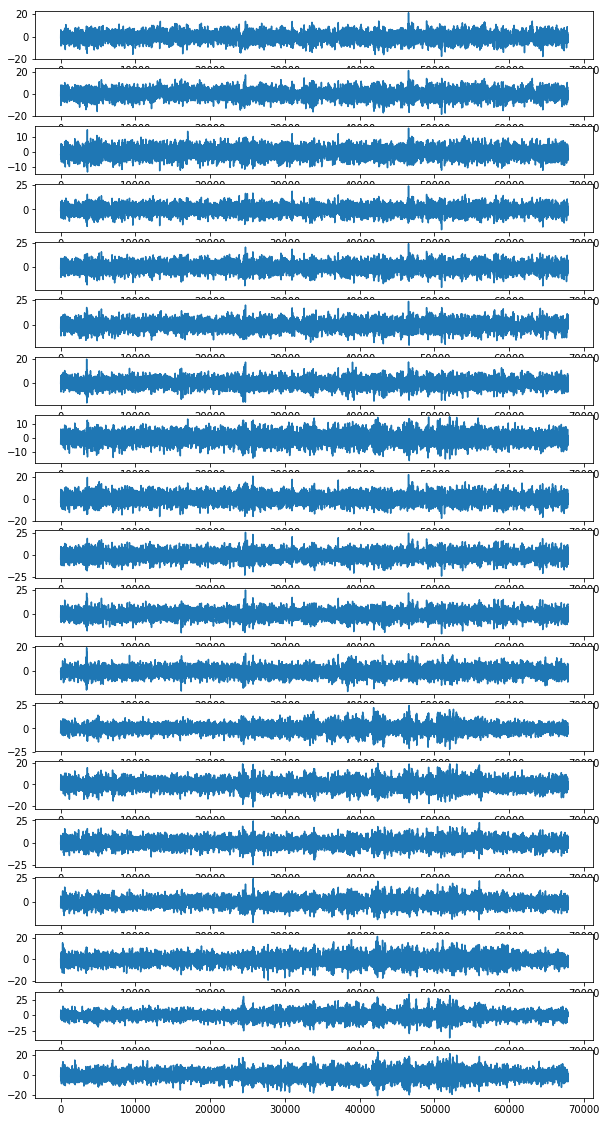

array([[-0.95, -1.47, -1.84, ...,  0.12, -2.61, -1.6 ],
       [-0.19,  0.03, -1.64, ..., -1.02, -1.93, -1.54],
       [ 0.34,  1.24, -1.06, ..., -1.63, -0.83, -0.98],
       ...,
       [ 0.27,  2.53,  0.5 , ...,  1.49,  2.59,  0.74],
       [-0.33,  2.53, -0.22, ...,  2.2 ,  3.29,  1.03],
       [-0.79,  2.66, -0.63, ...,  2.89,  2.74,  0.87]])

In [14]:
srate,num_freqs = 250,10
Bax = RestingEEG(filename, srate=srate, num_freqs = num_freqs)
Bax.load_data(plot_show = True)

### Вычисление относительного спектра мощности
можно считать по всему каналам, можно выбрать, смотрите код

Compute channel:  1
Compute channel:  2
Compute channel:  1
Compute channel:  2


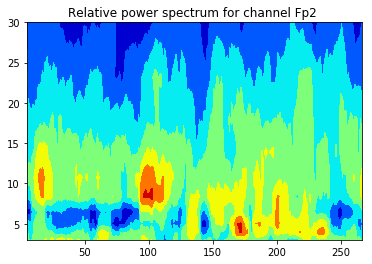

In [18]:
relPow = compute_relative_power(filename,filename_fon, elList = [0,1])
times = relPow['times'] * 1 / srate
id_ = 1
plt.contourf(times, relPow['freqs'], relPow['pow'][:,:,id_], cmap=plt.cm.jet);
plt.title('Relative power spectrum for channel {} '.format(relPow['chan_dict'][relPow['chans'][id_]]));


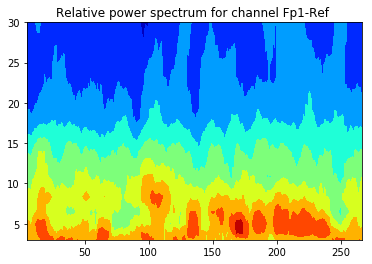

In [19]:
id_ = 0
plt.contourf(times, relPow['freqs'], relPow['pow'][:,:,id_], cmap=plt.cm.jet);
plt.title('Relative power spectrum for channel {} '.format(relPow['chan_dict'][relPow['chans'][id_]]));


### Графики когерентности
для нескольких пар, надо бы посмотреть все F между собой, и F c O и P

In [23]:
def compute_coher(filename, chanel1_id, chanel2_id, srate=srate, num_freqs = num_freqs):
    exp = RestingEEG(filename, srate, num_freqs)
    exp.load_data(plot_show=False)
    spc = exp.spectral_coher(chanel1_id=chanel1_id, chanel2_id=chanel2_id)


    return spc

def plot_spectrum(filename, filename_fon, chan1,chan2):

    spc = compute_coher(filename, chan1, chan2)
    spc_fon = compute_coher(filename_fon, chan1, chan2)

    times = spc['times'] * 1 / srate
    
    plt.figure(figsize = (14,8))
    plt.subplot(211);
    plt.contourf(times, spc['freqs'], spc['spc'], cmap=plt.cm.jet);
    plt.colorbar();
    plt.title('Meditation, spc for channel {} and {}'.format(spc['chan_dict'][chan1], spc['chan_dict'][chan2]))
    plt.subplot(212);
    plt.contourf(times, spc_fon['freqs'], spc_fon['spc'], cmap=plt.cm.jet);
    plt.colorbar();
    plt.title('Resting, spc for channel {} and {}'.format(spc['chan_dict'][chan1], spc['chan_dict'][chan2]))

    plt.show()

Compute channel:  1
Compute channel:  2
Compute channel:  1
Compute channel:  2


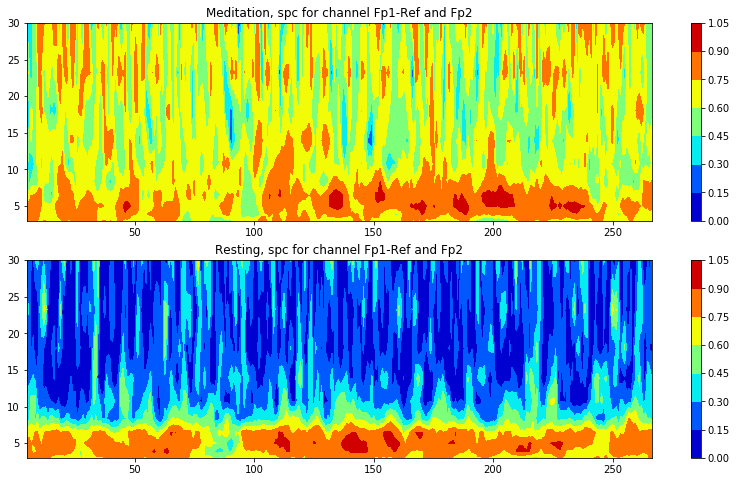

In [24]:
plot_spectrum(filename, filename_fon, 0,1)

Compute channel:  1
Compute channel:  15
Compute channel:  1
Compute channel:  15


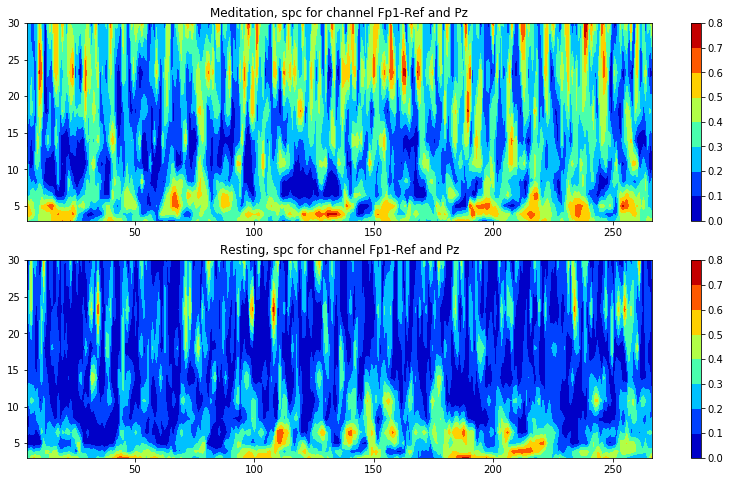

In [25]:
plot_spectrum(filename, filename_fon, 0,14)

Compute channel:  1
Compute channel:  18
Compute channel:  1
Compute channel:  18


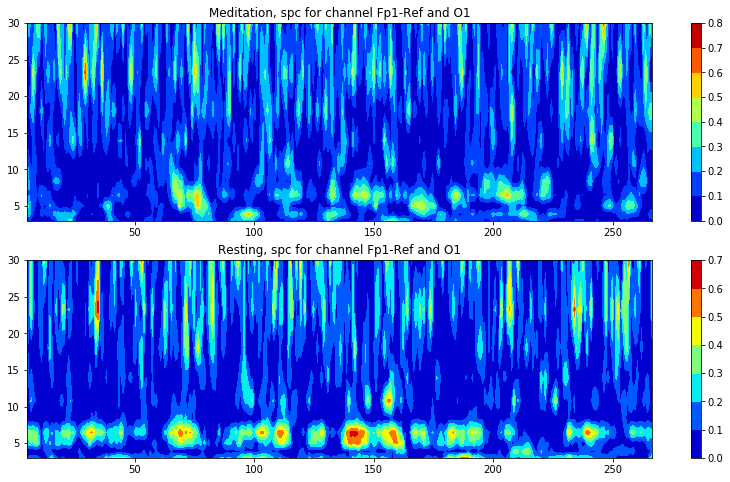

In [26]:
plot_spectrum(filename, filename_fon, 0,17)